# Introduction to PyTorch

In this lesson, we will learn the basics of PyTorch, a popular deep learning framework. We will cover the following topics:

1. Tensors
2. Autograd
3. Building a simple neural network

## 1. Tensors


In [1]:
import torch
# Create a tensor
# https://pytorch.org/docs/stable/generated/torch.tensor.html#torch-tensor
x = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)
print("x:", x)

import numpy as np
x = torch.tensor(np.array([[1, 2], [3, 4]]), dtype=torch.float32)
print("x:", x)

# create some special tensors
# https://pytorch.org/docs/stable/torch.html#tensor-creation-ops
# Create a tensor of zeros
y = torch.zeros(2, 2)
print("y:", y)

# Create a tensor of ones
z = torch.ones(2, 2)
print("z:", z)

# Create a random tensor
w = torch.rand(2, 2)
print("w:", w)

v = torch.rand(1)

print('v: ', v, "item: ", v.item()) # item:将张量值按标准python数字返回

x: tensor([[1., 2.],
        [3., 4.]])
x: tensor([[1., 2.],
        [3., 4.]])
y: tensor([[0., 0.],
        [0., 0.]])
z: tensor([[1., 1.],
        [1., 1.]])
w: tensor([[0.7815, 0.6803],
        [0.1259, 0.4228]])
v:  tensor([0.0607]) item:  0.06074303388595581


In [6]:
x = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
# basic attributes
print(x.dtype)
print(x.shape)
print(x.device) # 存储设备
print(x.requires_grad) # 是否会参与自动求导


torch.int64
torch.Size([3, 3])
cpu
False


In [7]:

# indexing, slicing
# https://pytorch.org/docs/stable/torch.html#indexing-slicing-joining-mutating-ops
print(x)
print(x[1][2])
print(x[0:2, 1:3]) #(0,1)->(1,2)
print(x[:, 2])

# transpose
print(x.T)

# reshape
print(x.reshape(1, 9)) # 1*9
print(x.reshape(1, -1)) # auto infer -1
print(x.shape)




tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
tensor(6)
tensor([[2, 3],
        [5, 6]])
tensor([3, 6, 9])
tensor([[1, 4, 7],
        [2, 5, 8],
        [3, 6, 9]])
tensor([[1, 2, 3, 4, 5, 6, 7, 8, 9]])
tensor([[1, 2, 3, 4, 5, 6, 7, 8, 9]])
torch.Size([3, 3])


In [ ]:
y = x.unsqueeze(dim = 0) # add a dimension 1 at dim=i,e.g.dim=0->1*3*3,dim=1->3*1*3
print(y.shape)
print(y)

z = y.squeeze()
print(z.shape)
print(z)

torch.Size([1, 3, 3])
tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
torch.Size([3, 3])
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


In [ ]:
print(x.permute(1, 0)) # dimension(0,1) -> (1,0)=T

tensor([[1, 4, 7],
        [2, 5, 8],
        [3, 6, 9]])


cat / stack

In [18]:
tensor_list = [torch.rand(2, 3 + i, 4) for i in range(10)]
print(tensor_list[0].shape, len(tensor_list))
print(torch.cat(tensor_list, dim = 1).shape)

torch.Size([2, 3, 4]) 10
torch.Size([2, 75, 4])


In [16]:
tensor_list = [torch.rand(2, 3, 4) for i in range(10)]
print(torch.stack(tensor_list, dim = 1).shape)

torch.Size([2, 10, 3, 4])


mathematical operations

In [20]:
# 运算
x = torch.arange(20, dtype=torch.float32).reshape(5, 4)
print(x)

# sum, mean, ...
print(x.sum())
print(x.sum(axis=0))


tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])
tensor(190.)
tensor([40., 45., 50., 55.])


In [ ]:
print(x)
print(x.add(1)) # x + 1
print(x.sub(1))
print(x.pow(2))
print(x.clamp(min = 5))
x.add_(1) # it will change x(x+=1)
print(x)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])
tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.],
        [13., 14., 15., 16.],
        [17., 18., 19., 20.]])
tensor([[-1.,  0.,  1.,  2.],
        [ 3.,  4.,  5.,  6.],
        [ 7.,  8.,  9., 10.],
        [11., 12., 13., 14.],
        [15., 16., 17., 18.]])
tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]])
tensor([[ 5.,  5.,  5.,  5.],
        [ 5.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])
tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.],
        [13., 14., 15., 16.],
        [17., 18., 19., 20.]])


In [ ]:
x = torch.arange(20, dtype=torch.float32).reshape(5, 4)
y = x.clone()  # 通过分配新内存，将A的一个副本分配给B
x, x + y, x * y

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.],
         [24., 26., 28., 30.],
         [32., 34., 36., 38.]]),
 tensor([[  0.,   1.,   4.,   9.],
         [ 16.,  25.,  36.,  49.],
         [ 64.,  81., 100., 121.],
         [144., 169., 196., 225.],
         [256., 289., 324., 361.]]))

In [ ]:
print(x @ y.T)
print(torch.mm(x, y.T)) # mm=mat multiplication(@)

tensor([[  14.,   38.,   62.,   86.,  110.],
        [  38.,  126.,  214.,  302.,  390.],
        [  62.,  214.,  366.,  518.,  670.],
        [  86.,  302.,  518.,  734.,  950.],
        [ 110.,  390.,  670.,  950., 1230.]])
tensor([[  14.,   38.,   62.,   86.,  110.],
        [  38.,  126.,  214.,  302.,  390.],
        [  62.,  214.,  366.,  518.,  670.],
        [  86.,  302.,  518.,  734.,  950.],
        [ 110.,  390.,  670.,  950., 1230.]])


In [22]:
# broadcasting
print(x.shape)
print(x + 2)
print(x + torch.tensor([10, 20, 30, 40]))

torch.Size([5, 4])
tensor([[ 2.,  3.,  4.,  5.],
        [ 6.,  7.,  8.,  9.],
        [10., 11., 12., 13.],
        [14., 15., 16., 17.],
        [18., 19., 20., 21.]])
tensor([[10., 21., 32., 43.],
        [14., 25., 36., 47.],
        [18., 29., 40., 51.],
        [22., 33., 44., 55.],
        [26., 37., 48., 59.]])


# Datasets & DataLoaders

In [3]:
# Loading a Dataset
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

import requests

session = requests.Session()
session.proxies = {
    'http': 'http://192.168.1.102:7897',
    'https': 'http://192.168.1.102:7897'
}

# https://docs.pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

KeyboardInterrupt: 

In [34]:
training_data[0][1]

9

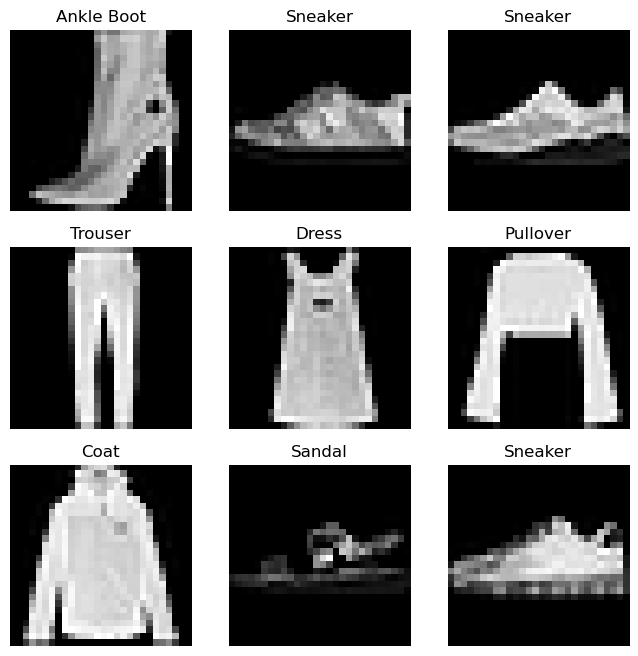

In [35]:
# Iterating and Visualizing the Dataset
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [36]:
# Creating a Custom Dataset for your files
import os
import pandas as pd
from torchvision.io import decode_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = decode_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label


# labels.csv:
    # tshirt1.jpg, 0
    # tshirt2.jpg, 0
    # ......
    # ankleboot999.jpg, 9
    

In [37]:
# Preparing data with DataLoaders
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


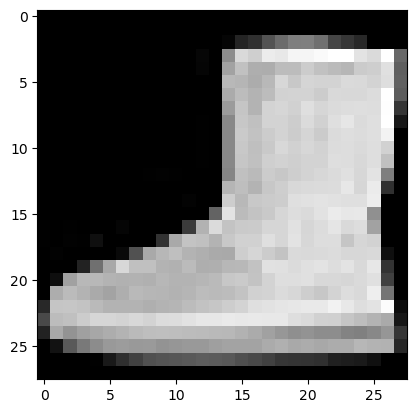

Label: 9


In [ ]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}") # batch_size * img
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

# Transforms

In [ ]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(), # (0,255) -> (0,1)
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1)) 
    # one-hot tensor,independent tensor(in case the model regard the task as a regression task)
)

In [40]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.RandomCrop(224),  # 随机裁剪
    transforms.RandomHorizontalFlip(),  # 随机水平翻转
    transforms.ToTensor(),  # 转张量
    transforms.Normalize(mean=[0.5], std=[0.5])  # 标准化
])